# Proyek Analisis Data : Bike Sharing

Nama: Arif Budiman\
Email: arifbudiman2506@gmail.com\
ID Dicoding: arbud25

# Menentukan Pertanyaan Bisnis

1.Bagaimana Penggunaan Bike Sharing Berdasarkan Musim (Season) pada Penggunaan per-hari (Day) dan penggunaan per-jam (Hour)?\
2.Bagaimana Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) pada Penggunaan per-hari (Day) dan per-jam (Hour)?\
3.Bagaimana Segmentasi Penggunaan Bike Sharing Berdasarkan status pengguna (Casual dan Registered) pada Penggunaan per-hari (Day) dan per-jam (Hour)?\
4.Bagaimana Tren Penggunaan Bike Sharing Berdasarkan Bulan dan Hari Apa Saja Untuk Penggunaan Day dan Pada Jam Berapa Saja Penggunaan Paling Banyak pada penggunaan per-jam (Hour)?


# Menyiapkan Semua Library Yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

C:\Users\Arbud\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Wrangling

## Gathering Data

### Memuat Tabel Day

In [2]:
tabelday = r'C:\Users\Arbud\Downloads\Proyek Data Analisis\Data\day.csv'
day_df = pd.read_csv(tabelday)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Memuat Tabel Hour

In [3]:
tabelhour = r'C:\Users\Arbud\Downloads\Proyek Data Analisis\Data\hour.csv'
hour_df = pd.read_csv(tabelhour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data 

### Day_df

Menilai Data Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Periksa Duplikasi Data dan Cek Parameter Statistiknya

In [6]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour_df

Menilai Data Hours

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek Missing Value

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Periksa Duplikasi Data dan Cek Parameter Statistiknya

In [9]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data 

### Day_df

Mengubah (replace) data pada kolom season dimana data masih berupa angka cth:1,2,3,dan 4 
menjadi kategori seperti cth: spring,summer,fall, dan winter

In [10]:
day_df.season.replace((1,2,3,4), ("Spring", "Summer", "Fall", "Winter"), inplace=True)

In [11]:
day_df.season.sample(20)

594      Fall
55     Spring
653    Winter
300    Winter
467    Summer
598      Fall
250      Fall
307    Winter
578      Fall
230      Fall
724    Spring
104    Summer
556      Fall
409    Spring
279    Winter
596      Fall
66     Spring
44     Spring
487    Summer
347    Winter
Name: season, dtype: object

merubah (replace) data pada kolom yr dimana data masih berupa angka seperti 0 dan 1
menjadi 0 : 2011 dan 1 : 2012

In [12]:
day_df.yr.replace((0, 1), (2011, 2012), inplace=True)

In [13]:
day_df.yr.sample(10)

239    2011
502    2012
180    2011
682    2012
648    2012
64     2011
212    2011
136    2011
632    2012
429    2012
Name: yr, dtype: int64

Mengubah (replace) data pada kolom weathersit dimana data masih berupa angka cth:1,2,3,dan 4 
menjadi kategori seperti cth: Clear,Mist,Light Rain, dan Heavy Rain

In [14]:
day_df.weathersit.replace((1,2,3,4), ("Clear","Mist","Light Rain", "Heavy Rain"), inplace=True)

In [15]:
day_df.weathersit.sample(10)

158    Clear
427     Mist
526    Clear
305    Clear
460    Clear
268     Mist
220    Clear
320     Mist
275     Mist
21     Clear
Name: weathersit, dtype: object

Mengubah (replace) data tabel day pada kolom weekday dimana data masih berupa angka cth:0,1,2,3,4,5, dan 6 
menjadi kategori seperti cth: Minggu,Senin,Selasa,Rabu,Kamis,Jum'at, dan Sabtu

In [16]:
day_df.weekday.replace((0,1,2,3,4,5,6), ("Minggu","Senin","Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu"), inplace=True)

In [17]:
day_df.weekday.sample(10)

504     Sabtu
524    Jum'at
593     Kamis
208     Kamis
133     Sabtu
514    Selasa
481     Kamis
292     Kamis
568    Minggu
566    Jum'at
Name: weekday, dtype: object

Memperbaiki Format pada kolom dteday dari dataframe day dari format object menjadi format datetime

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [19]:
day_df.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


### Hour_df

Mengubah (replace) data pada kolom season dimana data masih berupa angka cth:1,2,3,dan 4 
menjadi kategori seperti cth: spring,summer,fall, dan winter

In [20]:
hour_df.season.replace((1,2,3,4), ("Spring", "Summer", "Fall", "Winter"), inplace=True)

In [21]:
hour_df.season.sample(10)

10734    Summer
7567     Winter
4068       Fall
13651      Fall
15732    Winter
14252      Fall
12674    Summer
6277     Winter
461      Spring
17097    Winter
Name: season, dtype: object

merubah (replace) data pada kolom yr dimana data masih berupa angka seperti 0 dan 1
menjadi 0 : 2011 dan 1 : 2012

In [22]:
hour_df.yr.replace((0, 1), (2011, 2012), inplace=True)

In [23]:
hour_df.yr.sample(10)

9828     2012
3006     2011
7069     2011
9126     2012
11147    2012
10505    2012
14065    2012
8954     2012
498      2011
13334    2012
Name: yr, dtype: int64

Mengubah (replace) data pada kolom weathersit dimana data masih berupa angka cth:1,2,3,dan 4 
menjadi kategori seperti cth: Clear,Mist,Light Rain, dan Heavy Rain

In [24]:
hour_df.weathersit.replace((1,2,3,4), ("Clear","Mist","Light Rain", "Heavy Rain"), inplace=True)

In [25]:
hour_df.weathersit.sample(10)

15176         Clear
15918         Clear
6333          Clear
4653          Clear
2161           Mist
5901           Mist
6123          Clear
5060     Light Rain
8098          Clear
10415         Clear
Name: weathersit, dtype: object

Mengubah (replace) data tabel hour pada kolom weekday dimana data masih berupa angka cth:0,1,2,3,4,5, dan 6 
menjadi kategori seperti cth: Minggu,Senin,Selasa,Rabu,Kamis,Jum'at, dan Sabtu

In [26]:
hour_df.weekday.replace((0,1,2,3,4,5,6), ("Minggu","Senin","Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu"), inplace=True)

In [27]:
hour_df.weekday.sample(10)

12271     Kamis
5252      Kamis
4718       Rabu
14172     Sabtu
12650     Sabtu
8525      Senin
10861     Senin
13407    Selasa
12437     Kamis
9386       Rabu
Name: weekday, dtype: object

Memperbaiki Format pada kolom dteday dari dataframe hour dari format object menjadi format datetime

In [28]:
datetime_columns_hour = ["dteday"]

for column in datetime_columns_hour:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [29]:
day_df.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


# Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [30]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Sabtu,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
#mengetahui jumlah pengguna per-hari (day) berdasarkan musim dan tahun
season = day_df.groupby(by=["season","yr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

season

cnt
season yr          
Fall   2012  641479
Summer 2012  571273
Winter 2012  515476
Fall   2011  419650
Summer 2011  347316
Winter 2011  326137
Spring 2012  321348
       2011  150000

In [32]:
#Mengetahui jumlah penggunaan berdasarkan cuaca dan tahun
cuaca = day_df.groupby(by=["weathersit","yr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt",ascending=False)

cuaca

cnt
weathersit yr           
Clear      2012  1422885
           2011   835067
Mist       2012   613934
           2011   382924
Light Rain 2011    25112
           2012    12757

In [33]:
#mengetahui jumlah pengguna per-hari (day) berdasarkan tipe penggunanya (casual & registered)
tipe = day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum"
}).sort_values(by=["casual", "registered"], ascending=False)

tipe.sample(2)

,casual,registered
yr,,
2011,247252,995851
2012,372765,1676811


In [34]:
#Mengetahui Pada Hari Apa Saja Jumlah Penggunaan paling banyak
hari = day_df.groupby(by="weekday").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

hari

,cnt
weekday,
Jum'at,487790
Kamis,485395
Sabtu,477807
Rabu,473048
Selasa,469109
Senin,455503
Minggu,444027


In [35]:
# Merubah Format pada dteday menjadi tahun dan bulan
pengguna_bulanan_day = day_df.resample(rule='M', on='dteday').agg({
    'yr': 'unique',
    'cnt': 'sum'
})

pengguna_bulanan_day.index = pengguna_bulanan_day.index.strftime('%Y-%m')
pengguna_bulanan_day = pengguna_bulanan_day.reset_index()
pengguna_bulanan_day.rename(columns={
    'yr': 'tahun',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

pengguna_bulanan_day.sample(10)

,dteday,tahun,jumlah_pengguna
22,2012-11,[2012],152664
7,2011-08,[2011],136691
0,2011-01,[2011],38189
5,2011-06,[2011],143512
20,2012-09,[2012],218573
1,2011-02,[2011],48215
2,2011-03,[2011],64045
23,2012-12,[2012],123713
19,2012-08,[2012],214503
13,2012-02,[2012],103137


In [36]:
#Mengubah Format dteday Menjadi Bulan
pengguna_bulanan_day = day_df.resample(rule='M', on='dteday').agg({
    'yr': 'unique',
    'cnt': 'sum'
})

pengguna_bulanan_day.index = pengguna_bulanan_day.index.strftime('%B')
pengguna_bulanan_day = pengguna_bulanan_day.reset_index()
pengguna_bulanan_day.rename(columns={
    'yr': 'tahun',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

In [37]:
pengguna_bulanan_2011 = pengguna_bulanan_day[pengguna_bulanan_day['tahun'] == 2011]
pengguna_bulanan_2011.head()

,dteday,tahun,jumlah_pengguna
0,January,[2011],38189
1,February,[2011],48215
2,March,[2011],64045
3,April,[2011],94870
4,May,[2011],135821


In [38]:
pengguna_bulanan_2012 = pengguna_bulanan_day[pengguna_bulanan_day['tahun'] == 2012]
pengguna_bulanan_2012.head()

,dteday,tahun,jumlah_pengguna
12,January,[2012],96744
13,February,[2012],103137
14,March,[2012],164875
15,April,[2012],174224
16,May,[2012],195865


### Explorasi Data hour_df

In [39]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,Sabtu,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [40]:
#mengetahui jumlah pengguna per-jam (hour) berdasarkan musim dan tahun
season_hour = hour_df.groupby(by=["season","yr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

season_hour

cnt
season yr          
Fall   2012  641479
Summer 2012  571273
Winter 2012  515476
Fall   2011  419650
Summer 2011  347316
Winter 2011  326137
Spring 2012  321348
       2011  150000

In [41]:
#Mengetahui jumlah penggunaan per-jam(hour) berdasarkan cuaca dan tahun
cuaca_hour = hour_df.groupby(by=["weathersit","yr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt",ascending=False)

cuaca_hour

cnt
weathersit yr           
Clear      2012  1463120
           2011   875053
Mist       2012   495433
           2011   300519
Light Rain 2012    90836
           2011    67495
Heavy Rain 2012      187
           2011       36

In [42]:
#mengetahui jumlah pengguna per-jam (hour) berdasarkan tipe penggunanya (casual & registered)
tipe_pengguna_hour = hour_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum"
}).sort_values(by=["casual", "registered"], ascending=False)

tipe_pengguna_hour.sample(2)

,casual,registered
yr,,
2011,247252,995851
2012,372765,1676811


In [43]:
#Mengetahui Pada jam berapa Saja Jumlah Penggunaan paling banyak
jam = hour_df.groupby(by="hr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

jam

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [44]:
# Merubah Format pada dteday menjadi tahun dan bulan
pengguna_bulanan_hour = hour_df.resample(rule='M', on='dteday').agg({
    'yr': 'unique',
    'cnt': 'sum'
})

pengguna_bulanan_hour.index = pengguna_bulanan_hour.index.strftime('%Y-%m')
pengguna_bulanan_hour = pengguna_bulanan_hour.reset_index()
pengguna_bulanan_hour.rename(columns={
    'yr': 'tahun',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

pengguna_bulanan_hour.sample(10)

,dteday,tahun,jumlah_pengguna
22,2012-11,[2012],152664
19,2012-08,[2012],214503
21,2012-10,[2012],198841
13,2012-02,[2012],103137
16,2012-05,[2012],195865
18,2012-07,[2012],203607
23,2012-12,[2012],123713
5,2011-06,[2011],143512
4,2011-05,[2011],135821
9,2011-10,[2011],123511


In [45]:
#Mengubah Format dteday Menjadi Bulan
pengguna_bulanan_hour = hour_df.resample(rule='M', on='dteday').agg({
    'yr': 'unique',
    'cnt': 'sum'
})

pengguna_bulanan_hour.index = pengguna_bulanan_hour.index.strftime('%B')
pengguna_bulanan_hour = pengguna_bulanan_hour.reset_index()
pengguna_bulanan_hour.rename(columns={
    'yr': 'tahun',
    'cnt': 'jumlah_pengguna'
}, inplace=True)

In [46]:
pengguna_bulanan_2011_hour = pengguna_bulanan_hour[pengguna_bulanan_hour['tahun'] == 2011]
pengguna_bulanan_2011_hour.head()

,dteday,tahun,jumlah_pengguna
0,January,[2011],38189
1,February,[2011],48215
2,March,[2011],64045
3,April,[2011],94870
4,May,[2011],135821


In [47]:
pengguna_bulanan_2012_hour = pengguna_bulanan_hour[pengguna_bulanan_hour['tahun'] == 2012]
pengguna_bulanan_2012_hour.head()

,dteday,tahun,jumlah_pengguna
12,January,[2012],96744
13,February,[2012],103137
14,March,[2012],164875
15,April,[2012],174224
16,May,[2012],195865


# Visualisasi dan Explanatory Analysis

### Pertanyaan 01 : Bagaimana Penggunaan Bike Sharing Berdasarkan Musim (Season) pada Penggunaan per-hari (Day) dan penggunaan per-jam (Hour)?

Penggunaan Bike Sharing Berdasarkan Musim (Season) Pada penggunaan Per-Hari (Day)

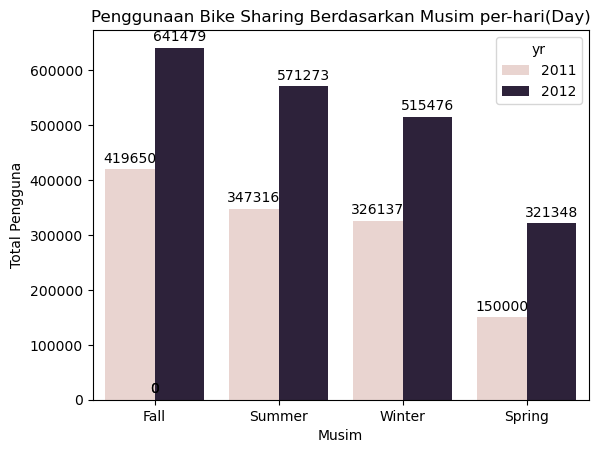

In [48]:
season_order = season.groupby('season')['cnt'].sum().sort_values(ascending=False).index
sns.barplot(data=season, x='season', y='cnt', hue='yr',order=season_order, errorbar=None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Penggunaan Bike Sharing Berdasarkan Musim per-hari(Day)')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna')
plt.show()

Penggunaan Bike Sharing Berdasarkan Musim (Season) Pada penggunaan Per-Jam (Hour)

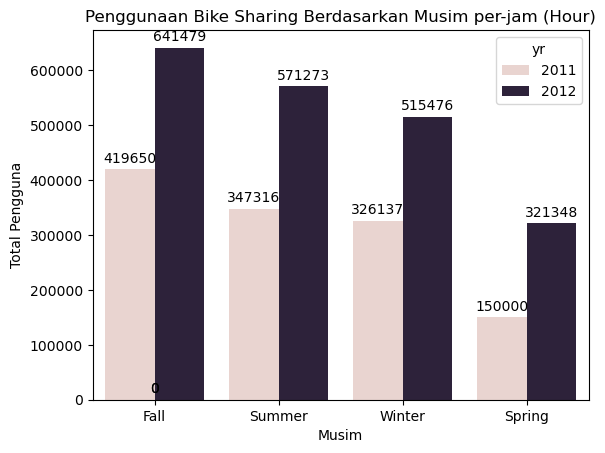

In [49]:
season_order_hour = season_hour.groupby('season')['cnt'].sum().sort_values(ascending=False).index
sns.barplot(data=season_hour, x='season', y='cnt', hue='yr',order=season_order_hour, errorbar=None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Penggunaan Bike Sharing Berdasarkan Musim per-jam (Hour)')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna')
plt.show()

### Pertanyaan 02 : Bagaimana Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) pada Penggunaan per-hari (Day) dan per-jam (Hour)?

Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) Pada penggunaan Per-Hari (Day)

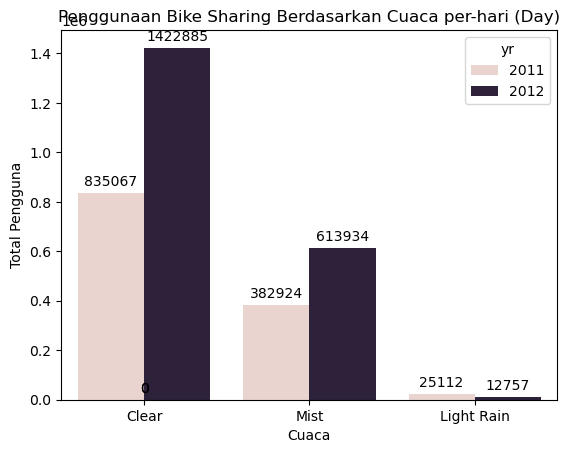

In [50]:
weathersit_order = cuaca.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index
sns.barplot(data=cuaca, x='weathersit', y='cnt', hue='yr',order=weathersit_order, errorbar=None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Penggunaan Bike Sharing Berdasarkan Cuaca per-hari (Day)')
plt.xlabel('Cuaca')
plt.ylabel('Total Pengguna')
plt.show()

Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) Pada penggunaan Per-Jam (Hour)

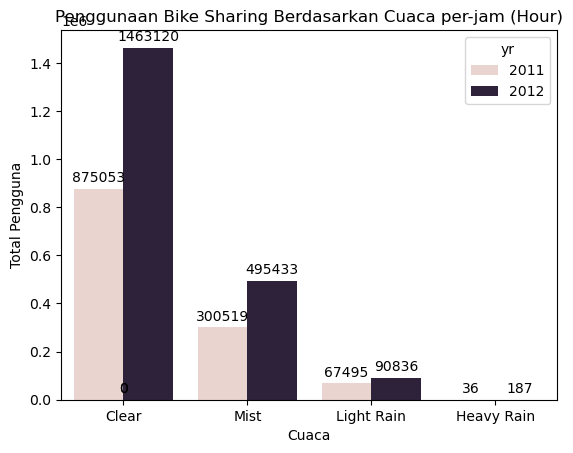

In [51]:
weathersit_order_hour = cuaca_hour.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index
sns.barplot(data=cuaca_hour, x='weathersit', y='cnt', hue='yr',order=weathersit_order_hour, errorbar=None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Penggunaan Bike Sharing Berdasarkan Cuaca per-jam (Hour)')
plt.xlabel('Cuaca')
plt.ylabel('Total Pengguna')
plt.show()

### Pertanyaan 03 : Bagaimana Segmentasi Penggunaan Bike Sharing Berdasarkan status pengguna (Casual dan Registered) pada Penggunaan per-hari (Day) dan per-jam (Hour)?

Penggunaan Bike Sharing Berdasarkan tipe pengguna per-hari (day)

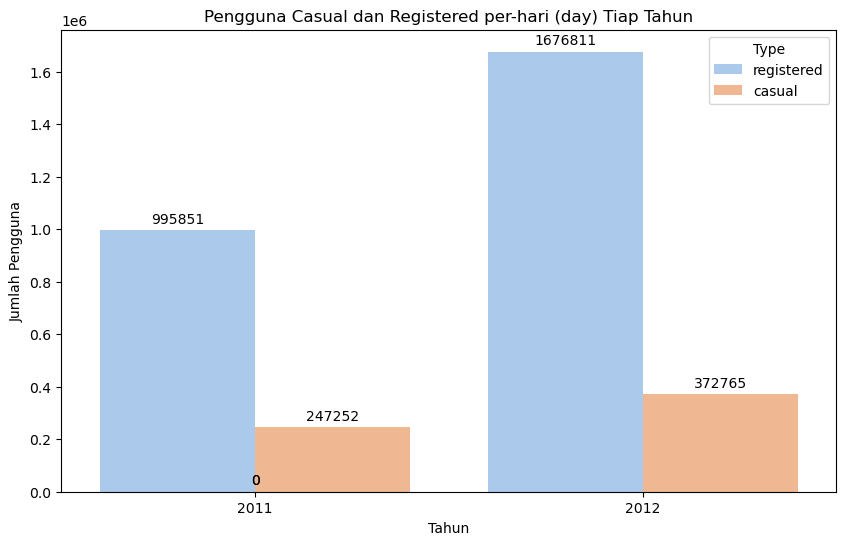

In [52]:
# Mengonversi hasil grupby ke format yang cocok untuk Seaborn
tipe = tipe.reset_index().melt(id_vars=['yr'], var_name='Type', value_name='Total')

# Mengurutkan data berdasarkan total
tipe = tipe.sort_values(by='Total', ascending=False)

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tipe, x='yr', y='Total', hue='Type', palette='pastel')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Pengguna Casual dan Registered per-hari (day) Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.show()

Penggunaan Bike Sharing Berdasarkan tipe pengguna per-jam (hour)

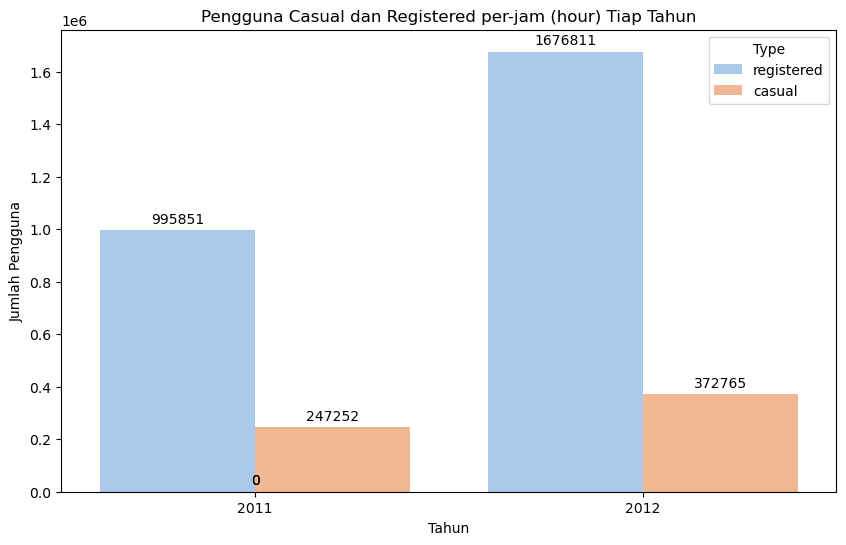

In [53]:
# Mengonversi hasil grupby ke format yang cocok untuk Seaborn
tipe_pengguna_hour = tipe_pengguna_hour.reset_index().melt(id_vars=['yr'], var_name='Type', value_name='Total')

# Mengurutkan data berdasarkan total
tipe_pengguna_hour = tipe_pengguna_hour.sort_values(by='Total', ascending=False)

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tipe_pengguna_hour, x='yr', y='Total', hue='Type', palette='pastel')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Pengguna Casual dan Registered per-jam (hour) Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pertanyaan 04 : Bagaimana Tren Penggunaan Bike Sharing Berdasarkan Bulan dan Hari Apa Saja Untuk Penggunaan Day dan Pada Jam Berapa Saja Penggunaan Paling Banyak pada penggunaan per-jam (Hour)?

Penggunaan Bike Sharing berdasarkan hari (day)

C:\Users\Arbud\AppData\Local\Temp\ipykernel_8328\3673394101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hari, x='weekday', y='cnt',order=weekday_order, palette=colors_, errorbar=None)


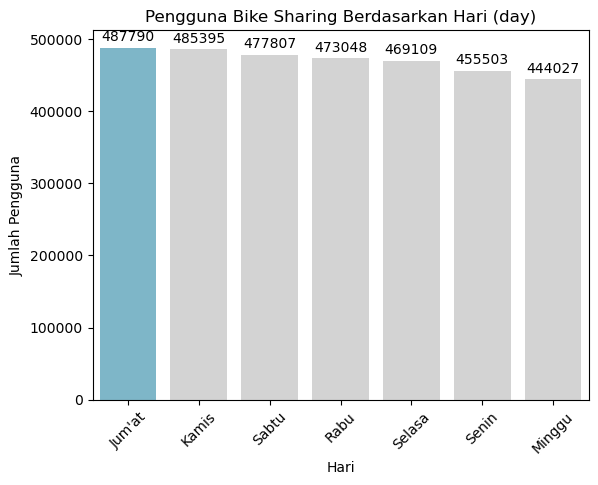

In [54]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
weekday_order = hari.groupby('weekday')['cnt'].sum().sort_values(ascending=False).index
sns.barplot(data=hari, x='weekday', y='cnt',order=weekday_order, palette=colors_, errorbar=None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Pengguna Bike Sharing Berdasarkan Hari (day)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

Penggunaan Bike Sharing per-hari (Day) berdasarkan Bulan pada tahun 2011

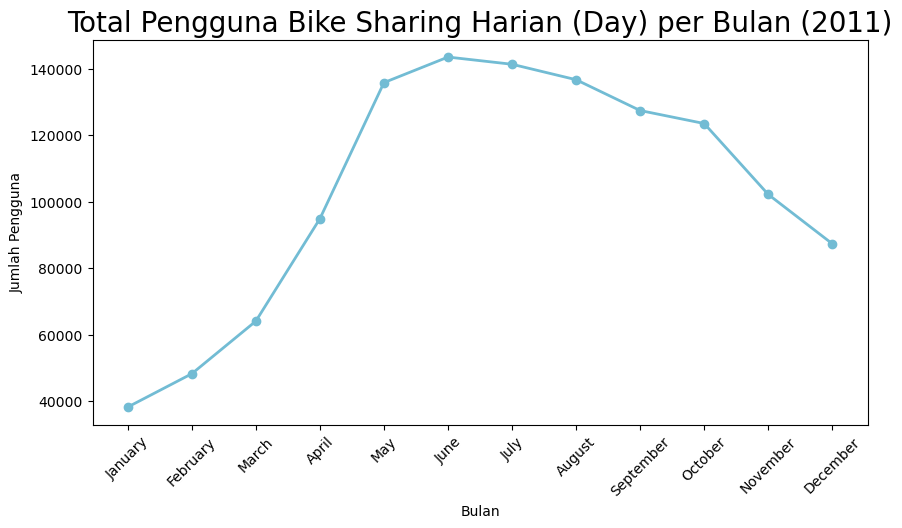

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(pengguna_bulanan_2011['dteday'], pengguna_bulanan_2011['jumlah_pengguna'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Pengguna Bike Sharing Harian (Day) per Bulan (2011)', loc='center', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45 , fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penggunaan Bike Sharing per-hari (Day) berdasarkan Bulan pada tahun 2012

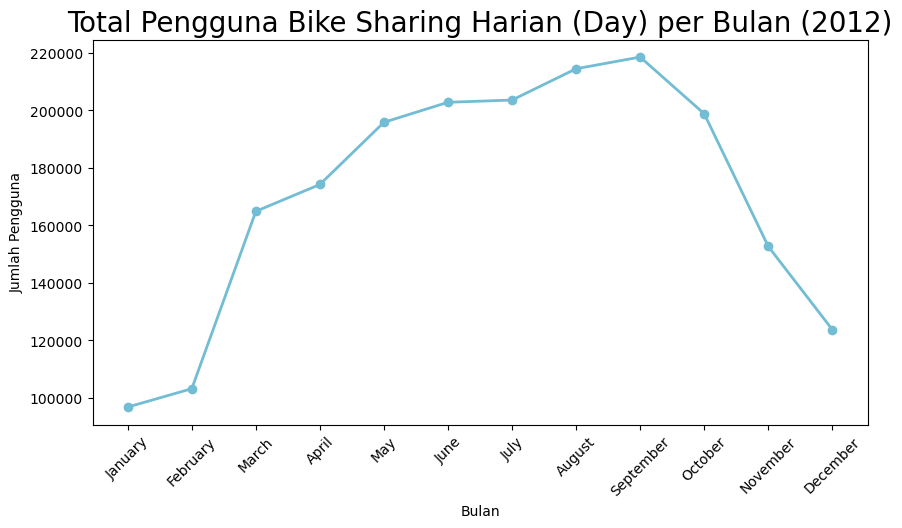

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(pengguna_bulanan_2012['dteday'], pengguna_bulanan_2012['jumlah_pengguna'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Pengguna Bike Sharing Harian (Day) per Bulan (2012)', loc='center', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penggunaan Bike Sharing berdasarkan Jam (Hour)

C:\Users\Arbud\AppData\Local\Temp\ipykernel_8328\1770466463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jam, x='hr', y='cnt',order=hour_order, palette=colors_, errorbar=None)
C:\Users\Arbud\AppData\Local\Temp\ipykernel_8328\1770466463.py:3: UserWarning: 
The palette list has fewer values (23) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=jam, x='hr', y='cnt',order=hour_order, palette=colors_, errorbar=None)


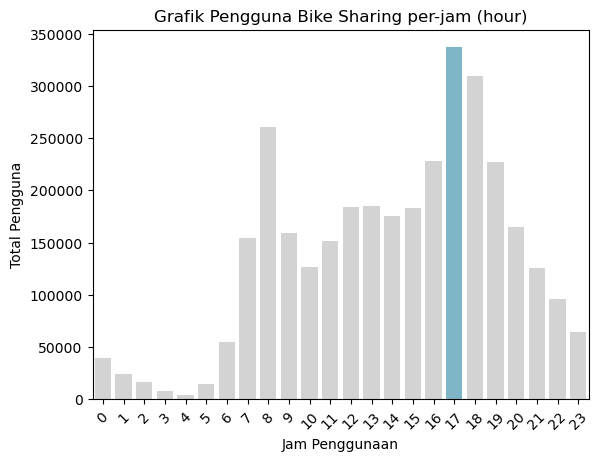

In [57]:
colors_ = ["#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
hour_order = jam.groupby('hr')['cnt'].sum().index
sns.barplot(data=jam, x='hr', y='cnt',order=hour_order, palette=colors_, errorbar=None)
plt.xticks(rotation=45)
plt.title('Grafik Pengguna Bike Sharing per-jam (hour)')
plt.xlabel('Jam Penggunaan')
plt.ylabel('Total Pengguna')
plt.show()

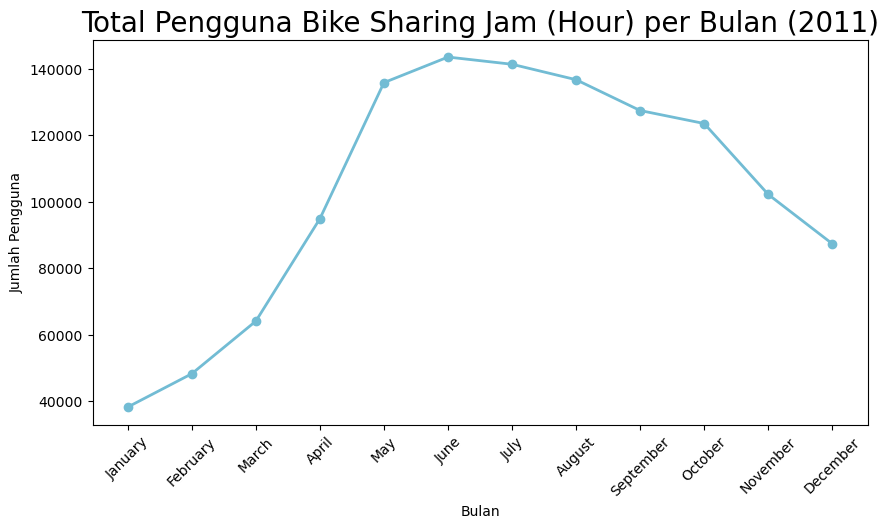

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(pengguna_bulanan_2011_hour['dteday'], pengguna_bulanan_2011_hour['jumlah_pengguna'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Pengguna Bike Sharing Jam (Hour) per Bulan (2011)', loc='center', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45 , fontsize=10)
plt.yticks(fontsize=10)
plt.show()

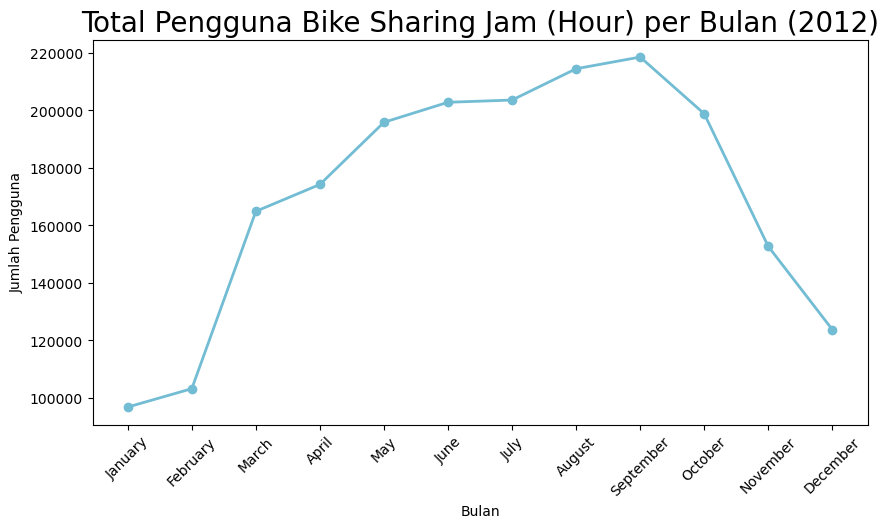

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(pengguna_bulanan_2012_hour['dteday'], pengguna_bulanan_2012_hour['jumlah_pengguna'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Pengguna Bike Sharing Jam (Hour) per Bulan (2012)', loc='center', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45 , fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Conclusion

### Conclusion Pertanyaan 01 : Bagaimana Penggunaan Bike Sharing Berdasarkan Musim (Season) pada Penggunaan per-hari (Day) dan penggunaan per-jam (Hour)?

Penggunaan Bike Sharing Berdasarkan Musim (Season) pada Penggunaan per-hari (day) dan penggunaan per-jam (hour)\
yang telah ditampilkan pada visualisasi menunjukkan bahwa penggunaan paling banyak terjadi pada musim Fall kemudian\
penggunaan paling rendah terjadi pada musim spring, untuk penggunaannya tiap tahun mengalami kenaikan dimana dari tahun\
2011 ke tahun 2012 selalu mengalami peningkatan pengguna tiap musimnya.

### Conclusion Pertanyaan 02 : Bagaimana Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) pada Penggunaan per-hari (Day) dan per-jam (Hour)?

Penggunaan Bike Sharing Berdasarkan Cuaca (Weathersit) pada penggunaan per-hari yang telah ditampilkan pada visualisasi\
menunjukkan bahwa penggunaan paling banyak terjadi saat cuaca Clear (cerah), dan penggunaan paling rendah ditunjukkan\
apabila cuaca dalam keadaan light rain, untuk penggunaan per-harinya tidak ditemukan adanya data pengguna yang melakukan\
bike sharing disaat cuaca heavy rain, dan juga tiap tahunnya penggunaan selalu meningkat disaat cuaca clear & mist,kecuali\
pada saat light rain penggunaan pada tahun 2011 lebih banyak dibanding penggunaan pada tahun 2012,itu menandakan bahwa\
terjadi penurunan pengguna bike sharing dari tahun 2011 ke tahun 2012 pada saat cuaca light rain, dan tidak ada yang\
melakukan bike sharing disaat cuaca sedang heavy rain.\
\
\
\
Sedangkan untuk penggunaan per-jam yang telah ditampilkan pada visualisasi menunjukkan bahwa pengguna bike sharing paling banyak\
terjadi saat cuaca Clear(cerah), dan penggunaan paling sedikit disaat cuaca Heavy Rain, untuk penggunaan bike sharing tiap tahun\
selalu mengalami kenaikan penggunaan.\
\
\
dari kedua data dapat ditemukan perbedaannya bahwa pengguna harian tidak menggunakan bike sharing apabila cuaca heavy rain\
sedangkan untuk pengguna per-jam ditemukan adanya pengguna bike sharing pada cuaca heavy rain. dan tiap tahunnya selalu mengalami\
kenaikan jumlah pengguna kecuali pada pengguna per-hari pada saat cuaca light rain terjadi penurunan jumlah pengguna.

### Conclusion Pertanyaan 03 : Bagaimana Segmentasi Penggunaan Bike Sharing Berdasarkan status pengguna (Casual dan Registered) pada Penggunaan per-hari (Day) dan per-jam (Hour)?

Jenis Pengguna Bike Sharing berdasarkan status penggunanya terbagi menjadi dua yaitu casual atau pengguna biasa yang tidak\
memiliki keanggotaan (member) dan pengguna yang terdaftar (registered).\
\
Berdasarkan hasil Visualisasi yang telah dilakukan menunjukkan bahwa pengguna bike sharing mengalami kenaikan dari tahun 2011\
ke tahun 2012.\
\
Pengguna bike sharing lebih banyak digunakan oleh mereka yang sudah terdaftar (registered) dibandingkan pengguna casual.\
untuk data pengguna per-hari dan per-jam nya menampilkan hasil yang sama.

### Conclusion Pertanyaan 04 : Bagaimana Tren Penggunaan Bike Sharing Berdasarkan Bulan dan Hari Apa Saja Untuk Penggunaan Day dan Pada Jam Berapa Saja Penggunaan Paling Banyak pada penggunaan per-jam (Hour)?

Tren penggunaan Bike Sharing Berdasarkan Bulan pada penggunaan per-hari dan per-jam berdasarkan hasil dari visualisasi yang\
telah dilakukan pada tahun 2011 grafik penggunaan dari bulan januari hingga juni terus mengalami kenaikan dan titik tertinggi\
terjadi pada bulan juni, sedangkan dari bulan juli hingga desember grafik pengguna mengalami penurunan.\
\
Sedangkan untuk tahun 2012 grafik penggunaan dari bulan januari hingga bulan september terus mengalami kenaikan jumlah pengguna\
sedangkan pada bulan oktober hingga desember jumlah pengguna mengalami penurunan.\
\
Untuk Pengguna per-hari (day) dapat diketahui bahwa pengguna bike sharing paling banyak dilakukan pada hari Jum'at sedangkan\
penggunaan paling sedikit terjadi pada hari minggu\
\
Untuk Penggunaan per-jam (hour) dapat diketahui bahwa pengguna bike sharing paling banyak dilakukan pada jam 17.00 sedangkan\
penggunaan paling sedikit terjadi pada jam 04.00